In [172]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from textblob import TextBlob,  Word
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import Text
import random
from wordcloud import WordCloud
from nltk import ngrams

#%run datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [173]:
#CARGO DATASET

M_tweets = pd.read_csv('train.csv')
M_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [174]:
def extractWordAfterSymbol(text,symbol):
    
    """ 
    RECIBE: Un texto plano que puede tener cualquier cosa
    DEVUELVE: Una lista de todos los strings que estaban precedidos por un 'symbol'
    
    
    Ejemplo User: symbol='@'
    EJEMPLO: 'Hola que tal soy @axel, y vivo en @capitalFederal' -----> [axel,capitalFederal]'
    
    Ejemplo hashtag: symbol='#'
    Ejemplo: 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all' --->[earthquake]
    """
    
    words = text.split(' ')
    
    users = []
    userToSave = ""
    for word in words:
        if len(word) != 0 and symbol in word:
            splittedWord = word.split(symbol)
            if len(splittedWord) > 1:
                userToSave = splittedWord[1]
            else:
                userToSave = splittedWord[0]
        if userToSave != '':
            users.append(userToSave)
            userToSave=''
    return users

In [175]:
def textWithoutStopwords(text):
    specialCharacters = ['&','\n','<','>','=',',','.','!','%','*','(',')','"','-','_', '?', '$', ':', '/','\''] + [str(i) for i in range(0,10)]
    output=""
    for word in text.split():
        if ((word not in stop_words) | (word not in specialCharacters) ):
            output+=word
            output+=" "
    output=output[:-1]
    return output

In [176]:
def list2text(list):
    text=""
    for w in list:
        text+=w
        text+=" "
    text=text[:-1]    
    return text

In [177]:
def takeOutSpecialCaractersFromText(text, specialCharacters = None):
    '''
    RECIBE: Un string.
    DEVUELVE: El string sin caracteres especiales. Con el parametro specialCharacters se puede decidir que caracteres sacar.
    '''
    if specialCharacters == None:
        specialCharacters = ['&','\n','<','>','=',',','.','!','%','#','*','(',')','"','-','_', '?', '$', ':', '/','\''] + [str(i) for i in range(0,10)]
    
    
    for char in specialCharacters:
        text = text.replace(char, ' ')
    return text

In [178]:
def freq2text(listKeyFreq):
    result=""
    for elem in listKeyFreq:
        for x in range(0,elem[1]):
            result+=elem[0]+" "
    return result

In [179]:
def freq2list(listKeyFreq):
    result=[]
    for elem in listKeyFreq:
        for x in range(0,elem[1]):
            result.append(elem[0])
    return result

In [180]:
def stemmedText(text):
    ps = PorterStemmer()
    toProcess=text.split()
    result=""
    for word in toProcess:
        result+=ps.stem(word)+" "
    result=result[:-1]    
    return result

In [181]:
specialCharacters = ['&','\n','<','>','=',',','.','!','%','*','(',')','"','-','_', '?', '$', ':', '/','\''] + [str(i) for i in range(0,10)]

In [182]:
M_tweets.iloc[12,:].text

"#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count "

In [183]:
extractWordAfterSymbol(M_tweets.iloc[12,:].text,'#')

['raining', 'flooding', 'Florida', 'TampaBay', 'Tampa']

# 43. Top Hashtags mas populares

In [184]:
M_tweets['textNoStop']=M_tweets['text'].apply(lambda x: textWithoutStopwords(x))

In [185]:
M_tweets['textNoStop2']=M_tweets['textNoStop']
M_tweets['textNoStop2']=M_tweets['textNoStop2'].apply(lambda x:takeOutSpecialCaractersFromText(x))

In [186]:
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...


In [187]:
M_tweets['hashtags']=M_tweets['textNoStop'].apply(lambda x: extractWordAfterSymbol( x.lower(),'#'))
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake]
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[]
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires]
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]"


In [188]:
freqWords = FreqDist(takeOutSpecialCaractersFromText(list2text(M_tweets.hashtags.sum()),specialCharacters).split())
print(freqWords)

<FreqDist with 1915 samples and 3359 outcomes>


In [189]:
commonHashtag=freqWords.most_common()
top15MostCommon=commonHashtag[:15]
top15MostCommon

[('news', 80),
 ('hot', 31),
 ('prebreak', 30),
 ('best', 30),
 ('nowplaying', 23),
 ('hiroshima', 23),
 ('islam', 23),
 ('earthquake', 19),
 ('gbbo', 19),
 ('jobs', 14),
 ('job', 12),
 ('isis', 12),
 ('terrorism', 12),
 ('breaking', 11),
 ('world', 11)]

# 44. TOP 15 HASHTAG MENOS POPULAR (MAS DE UNA VEZ) 

In [190]:
filteredCommonHashtag= [t for t in commonHashtag if t[1]>1]

In [191]:
top15LessCommon=filteredCommonHashtag[-15:]
top15LessCommon

[('sing', 2),
 ('tsunami', 2),
 ('computer', 2),
 ('toronto', 2),
 ('thegame', 2),
 ('stormchase', 2),
 ('amsterdam', 2),
 ('volcano', 2),
 ('billings', 2),
 ('rapidcity', 2),
 ('cheyenne', 2),
 ('whirlwind', 2),
 ('sale', 2),
 ('jonathanferrell', 2),
 ('kashmir', 2)]

# USANDO STEMMING

In [192]:
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake]
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[]
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires]
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]"


In [193]:
M_tweets['textNoStopFiltered']=M_tweets['textNoStop'].apply(lambda x: takeOutSpecialCaractersFromText(x,specialCharacters))

In [194]:
M_tweets.head(100)

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake],Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[],Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires],people receive #wildfires evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1,9 Mile backup on I-77 South...accident blockin...,Mile backup on I South accident blockin...,[],Mile backup on I South accident blockin...
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0,Has an accident changed your life? We will hel...,Has an accident changed your life We will hel...,[],Has an accident changed your life We will hel...
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1,#BREAKING: there was a deadly motorcycle car a...,BREAKING there was a deadly motorcycle car a...,"[breaking:, hagerstown, whag]",#BREAKING there was a deadly motorcycle car a...
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0,@flowri were you marinading it or was it an ac...,@flowri were you marinading it or was it an ac...,[],@flowri were you marinading it or was it an ac...


# Verificacion de hashtag stemmed

In [195]:
M_tweets['textNoStopFilteredStemmed']=M_tweets['textNoStopFiltered'].apply(lambda x: stemmedText(x))
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered,textNoStopFilteredStemmed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake],Our Deeds are the Reason of this #earthquake M...,our deed are the reason of thi #earthquak may ...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[],Forest fire near La Ronge Sask Canada,forest fire near La rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...,all resid ask to shelter in place are be notif...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires],people receive #wildfires evacuation or...,peopl receiv #wildfir evacu order in california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...,just got sent thi photo from rubi #alaska as s...


In [196]:
M_tweets['textNoStopFilteredStemmed2']=M_tweets['textNoStopFilteredStemmed']
M_tweets['textNoStopFilteredStemmed2']=M_tweets['textNoStopFilteredStemmed2'].apply(lambda x:takeOutSpecialCaractersFromText(x))

In [197]:
M_tweets.head(30)

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered,textNoStopFilteredStemmed,textNoStopFilteredStemmed2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake],Our Deeds are the Reason of this #earthquake M...,our deed are the reason of thi #earthquak may ...,our deed are the reason of thi earthquak may ...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[],Forest fire near La Ronge Sask Canada,forest fire near La rong sask canada,forest fire near La rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...,all resid ask to shelter in place are be notif...,all resid ask to shelter in place are be notif...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires],people receive #wildfires evacuation or...,peopl receiv #wildfir evacu order in california,peopl receiv wildfir evacu order in california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...,just got sent thi photo from rubi #alaska as s...,just got sent thi photo from rubi alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire Update => California Hwy. 20 closed...,RockyFire Update California Hwy closed...,"[rockyfire, cafire, wildfires]",#RockyFire Update California Hwy closed...,#rockyfir updat california hwi close in both d...,rockyfir updat california hwi close in both d...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,#flood #disaster Heavy rain causes flash flood...,flood disaster Heavy rain causes flash flood...,"[flood, disaster]",#flood #disaster Heavy rain causes flash flood...,#flood #disast heavi rain caus flash flood of ...,flood disast heavi rain caus flash flood of ...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,I'm on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,[],I m on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,There's an emergency evacuation happening now ...,There s an emergency evacuation happening now ...,[],There s an emergency evacuation happening now ...,there s an emerg evacu happen now in the build...,there s an emerg evacu happen now in the build...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,I'm afraid that the tornado is coming to our a...,I m afraid that the tornado is coming to our a...,[],I m afraid that the tornado is coming to our a...,I m afraid that the tornado is come to our area,I m afraid that the tornado is come to our area


In [198]:
M_tweets['hashtagsTextNoStopFilteredStemmed']=M_tweets['textNoStopFilteredStemmed'].apply(lambda x: extractWordAfterSymbol( x.lower(),'#'))
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered,textNoStopFilteredStemmed,textNoStopFilteredStemmed2,hashtagsTextNoStopFilteredStemmed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake],Our Deeds are the Reason of this #earthquake M...,our deed are the reason of thi #earthquak may ...,our deed are the reason of thi earthquak may ...,[earthquak]
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[],Forest fire near La Ronge Sask Canada,forest fire near La rong sask canada,forest fire near La rong sask canada,[]
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...,all resid ask to shelter in place are be notif...,all resid ask to shelter in place are be notif...,[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires],people receive #wildfires evacuation or...,peopl receiv #wildfir evacu order in california,peopl receiv wildfir evacu order in california,[wildfir]
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...,just got sent thi photo from rubi #alaska as s...,just got sent thi photo from rubi alaska as s...,"[alaska, wildfir]"


In [199]:
freqWordsStemmed = FreqDist(takeOutSpecialCaractersFromText(list2text(M_tweets.hashtagsTextNoStopFilteredStemmed.sum())).split())
print(freqWordsStemmed)

<FreqDist with 1824 samples and 3261 outcomes>


In [200]:
commonHashtagStemmed=freqWordsStemmed.most_common()
top15MostCommonStemmed=commonHashtagStemmed[:15]
top15MostCommonStemmed

[('new', 74),
 ('hot', 31),
 ('prebreak', 30),
 ('best', 30),
 ('job', 26),
 ('nowplay', 24),
 ('islam', 24),
 ('hiroshima', 23),
 ('earthquak', 19),
 ('gbbo', 19),
 ('wildfir', 13),
 ('isi', 12),
 ('terror', 12),
 ('flood', 11),
 ('break', 11)]

In [201]:
print(freq2text([('new', 2),('hot', 5)]))

new new hot hot hot hot hot 


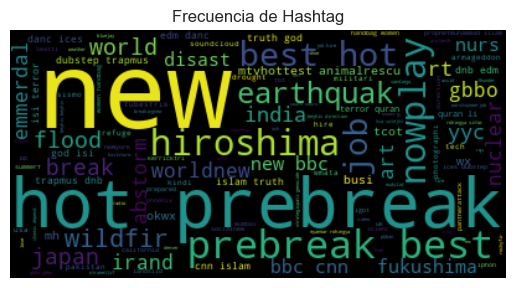

In [202]:
text=list2text(M_tweets.hashtagsTextNoStopFilteredStemmed.sum())
#wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
wordcloud = WordCloud().generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Frecuencia de Hashtag")
plt.show()

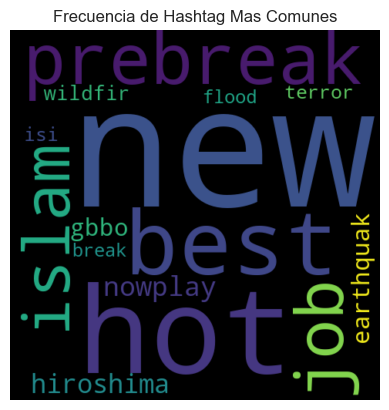

In [203]:
text=' '.join([str(word) for word in random.sample(freq2list(top15MostCommonStemmed), len(freq2list(top15MostCommonStemmed)))])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Frecuencia de Hashtag Mas Comunes")
plt.show()

In [204]:
filteredCommonHashtagStemmed= [t for t in commonHashtagStemmed if t[1]>1]
top15LessCommonStemmed=filteredCommonHashtagStemmed[-15:]
top15LessCommonStemmed


[('sing', 2),
 ('tsunami', 2),
 ('toronto', 2),
 ('thegam', 2),
 ('au', 2),
 ('stormchas', 2),
 ('amsterdam', 2),
 ('volcano', 2),
 ('bill', 2),
 ('rapidc', 2),
 ('cheyenn', 2),
 ('whirlwind', 2),
 ('sale', 2),
 ('jonathanferrel', 2),
 ('kashmir', 2)]

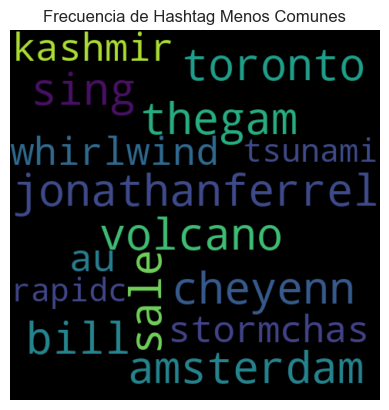

In [205]:
text=' '.join([str(word) for word in random.sample(freq2list(top15LessCommonStemmed), len(freq2list(top15LessCommonStemmed)))])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Frecuencia de Hashtag Menos Comunes")
plt.show()

# DISPERSION DE TODOS LOS HASHTAG EN LOS TWEETS

In [206]:
M_tweets['textNoStopFiltered'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [207]:
M_tweets['qWordsTextNoStopFiltered']=M_tweets['textNoStopFiltered'].apply(lambda x: len(x.split()))

In [208]:
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered,textNoStopFilteredStemmed,textNoStopFilteredStemmed2,hashtagsTextNoStopFilteredStemmed,qWordsTextNoStopFiltered
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake],Our Deeds are the Reason of this #earthquake M...,our deed are the reason of thi #earthquak may ...,our deed are the reason of thi earthquak may ...,[earthquak],13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[],Forest fire near La Ronge Sask Canada,forest fire near La rong sask canada,forest fire near La rong sask canada,[],7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...,all resid ask to shelter in place are be notif...,all resid ask to shelter in place are be notif...,[],22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires],people receive #wildfires evacuation or...,peopl receiv #wildfir evacu order in california,peopl receiv wildfir evacu order in california,[wildfir],7
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...,just got sent thi photo from rubi #alaska as s...,just got sent thi photo from rubi alaska as s...,"[alaska, wildfir]",16


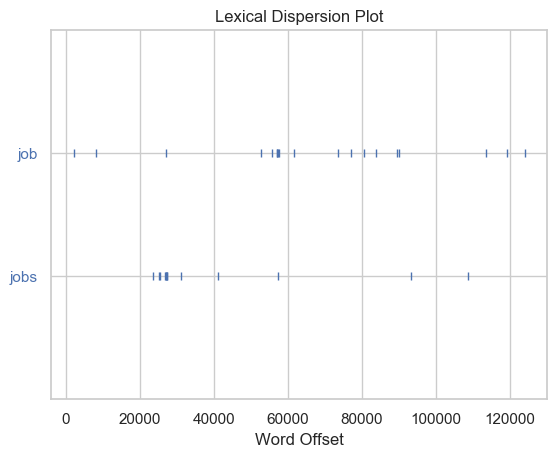

In [209]:
#TRANSFORMO EN TIPO TEXT LOS TWEETS PARA VER LA APARICION DE LAS PALABRAS EN RELACION A LOS TWEETS
tokens2 = word_tokenize(' '.join(M_tweets['textNoStop2']))
allTweets2 = Text(tokens2)
allTweets2.dispersion_plot(['job', 'jobs'])

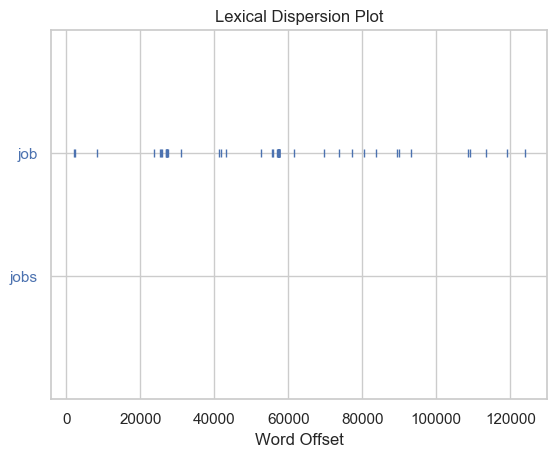

In [210]:
tokens = word_tokenize(' '.join(M_tweets['textNoStopFilteredStemmed2']))
allTweets = Text(tokens)
allTweets.dispersion_plot(['job', 'jobs'])


In [211]:
listCommonHashtag=[x[0] for x in top15MostCommonStemmed]
listCommonHashtag

['new',
 'hot',
 'prebreak',
 'best',
 'job',
 'nowplay',
 'islam',
 'hiroshima',
 'earthquak',
 'gbbo',
 'wildfir',
 'isi',
 'terror',
 'flood',
 'break']

In [212]:
top15MostCommonStemmed

[('new', 74),
 ('hot', 31),
 ('prebreak', 30),
 ('best', 30),
 ('job', 26),
 ('nowplay', 24),
 ('islam', 24),
 ('hiroshima', 23),
 ('earthquak', 19),
 ('gbbo', 19),
 ('wildfir', 13),
 ('isi', 12),
 ('terror', 12),
 ('flood', 11),
 ('break', 11)]

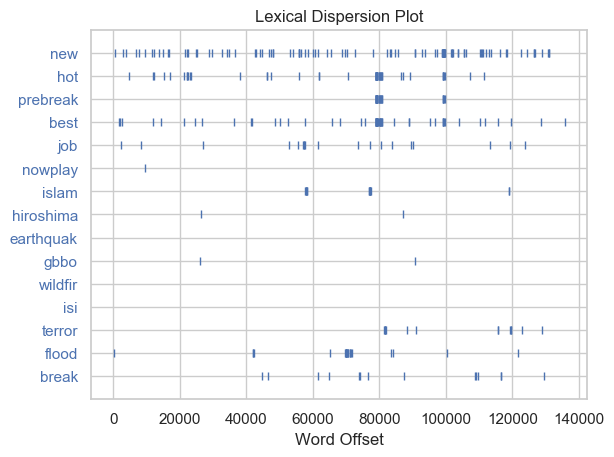

In [213]:
allTweets2.dispersion_plot(listCommonHashtag)

# ANALISIS DE FRASES

In [214]:
M_tweets.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered,textNoStopFilteredStemmed,textNoStopFilteredStemmed2,hashtagsTextNoStopFilteredStemmed,qWordsTextNoStopFiltered
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake M...,[earthquake],Our Deeds are the Reason of this #earthquake M...,our deed are the reason of thi #earthquak may ...,our deed are the reason of thi earthquak may ...,[earthquak],13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,[],Forest fire near La Ronge Sask Canada,forest fire near La rong sask canada,forest fire near La rong sask canada,[],7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...,all resid ask to shelter in place are be notif...,all resid ask to shelter in place are be notif...,[],22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation or...,[wildfires],people receive #wildfires evacuation or...,peopl receiv #wildfir evacu order in california,peopl receiv wildfir evacu order in california,[wildfir],7
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...,just got sent thi photo from rubi #alaska as s...,just got sent thi photo from rubi alaska as s...,"[alaska, wildfir]",16


In [215]:
meanWords=M_tweets.qWordsTextNoStopFiltered.mean()
round(meanWords+0.5)

18

In [216]:
M_tweets.qWordsTextNoStopFiltered.describe()

count    7613.000000
mean       17.460922
std         6.072361
min         1.000000
25%        13.000000
50%        18.000000
75%        22.000000
max        33.000000
Name: qWordsTextNoStopFiltered, dtype: float64

In [217]:
M_tweets2=M_tweets[M_tweets['qWordsTextNoStopFiltered']>13]
print (len(M_tweets))
print (len(M_tweets2))
M_tweets2.head()

7613
5682


,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered,textNoStopFilteredStemmed,textNoStopFilteredStemmed2,hashtagsTextNoStopFilteredStemmed,qWordsTextNoStopFiltered
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...,all resid ask to shelter in place are be notif...,all resid ask to shelter in place are be notif...,[],22
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...,just got sent thi photo from rubi #alaska as s...,just got sent thi photo from rubi alaska as s...,"[alaska, wildfir]",16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire Update => California Hwy. 20 closed...,RockyFire Update California Hwy closed...,"[rockyfire, cafire, wildfires]",#RockyFire Update California Hwy closed...,#rockyfir updat california hwi close in both d...,rockyfir updat california hwi close in both d...,"[rockyfir, cafir, wildfir]",15
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,#flood #disaster Heavy rain causes flash flood...,flood disaster Heavy rain causes flash flood...,"[flood, disaster]",#flood #disaster Heavy rain causes flash flood...,#flood #disast heavi rain caus flash flood of ...,flood disast heavi rain caus flash flood of ...,"[flood, disast]",14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,I'm on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,[],I m on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,[],16


In [218]:
M_tweets2['ngrams']=M_tweets2['textNoStopFilteredStemmed2'].apply(lambda x: list(ngrams(x.split(), round(meanWords))))

C:\Users\HW\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [219]:
M_tweets2.head()

,id,keyword,location,text,target,textNoStop,textNoStop2,hashtags,textNoStopFiltered,textNoStopFilteredStemmed,textNoStopFilteredStemmed2,hashtagsTextNoStopFilteredStemmed,qWordsTextNoStopFiltered,ngrams
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are ...,[],All residents asked to shelter in place are ...,all resid ask to shelter in place are be notif...,all resid ask to shelter in place are be notif...,[],22,"[(all, resid, ask, to, shelter, in, place, are..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as ...,"[alaska, wildfires]",Just got sent this photo from Ruby #Alaska as ...,just got sent thi photo from rubi #alaska as s...,just got sent thi photo from rubi alaska as s...,"[alaska, wildfir]",16,[]
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire Update => California Hwy. 20 closed...,RockyFire Update California Hwy closed...,"[rockyfire, cafire, wildfires]",#RockyFire Update California Hwy closed...,#rockyfir updat california hwi close in both d...,rockyfir updat california hwi close in both d...,"[rockyfir, cafir, wildfir]",15,[]
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,#flood #disaster Heavy rain causes flash flood...,flood disaster Heavy rain causes flash flood...,"[flood, disaster]",#flood #disaster Heavy rain causes flash flood...,#flood #disast heavi rain caus flash flood of ...,flood disast heavi rain caus flash flood of ...,"[flood, disast]",14,[]
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,I'm on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,[],I m on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,I m on top of the hill and I can see a fire in...,[],16,[]


In [220]:
ngrams=M_tweets2['ngrams'].sum()

In [221]:
fdistNgrams = FreqDist(ngrams)

In [222]:
mostCommonPhrases=fdistNgrams.most_common()
mostCommonPhrases

[(('wreckag',
   'conclus',
   'confirm',
   'as',
   'from',
   'MH',
   'malaysia',
   'PM',
   'investig',
   'and',
   'the',
   'famili',
   'of',
   'those',
   'who',
   'were',
   'http'),
  20),
 (('conclus',
   'confirm',
   'as',
   'from',
   'MH',
   'malaysia',
   'PM',
   'investig',
   'and',
   'the',
   'famili',
   'of',
   'those',
   'who',
   'were',
   'http',
   't'),
  20),
 (('confirm',
   'as',
   'from',
   'MH',
   'malaysia',
   'PM',
   'investig',
   'and',
   'the',
   'famili',
   'of',
   'those',
   'who',
   'were',
   'http',
   't',
   'co'),
  20),
 (('famili',
   'to',
   'sue',
   'over',
   'legionnair',
   'more',
   'than',
   'famili',
   'affect',
   'by',
   'the',
   'fatal',
   'outbreak',
   'of',
   'legionnair',
   'disea',
   'http'),
  19),
 (('to',
   'sue',
   'over',
   'legionnair',
   'more',
   'than',
   'famili',
   'affect',
   'by',
   'the',
   'fatal',
   'outbreak',
   'of',
   'legionnair',
   'disea',
   'http',
   '

In [223]:
mostCommonPhrases[0][1]

20

In [224]:
M_mostCommonPhrasesDf=pd.DataFrame(mostCommonPhrases)
M_mostCommonPhrasesDf.columns=['Frases','Frecuencia']
M_mostCommonPhrasesDf.head()

,Frases,Frecuencia
0,"(wreckag, conclus, confirm, as, from, MH, mala...",20
1,"(conclus, confirm, as, from, MH, malaysia, PM,...",20
2,"(confirm, as, from, MH, malaysia, PM, investig...",20
3,"(famili, to, sue, over, legionnair, more, than...",19
4,"(to, sue, over, legionnair, more, than, famili...",19


Text(0.5, 1.0, 'Frecuencia de Frases de Longitud Promedio (Len=17)')

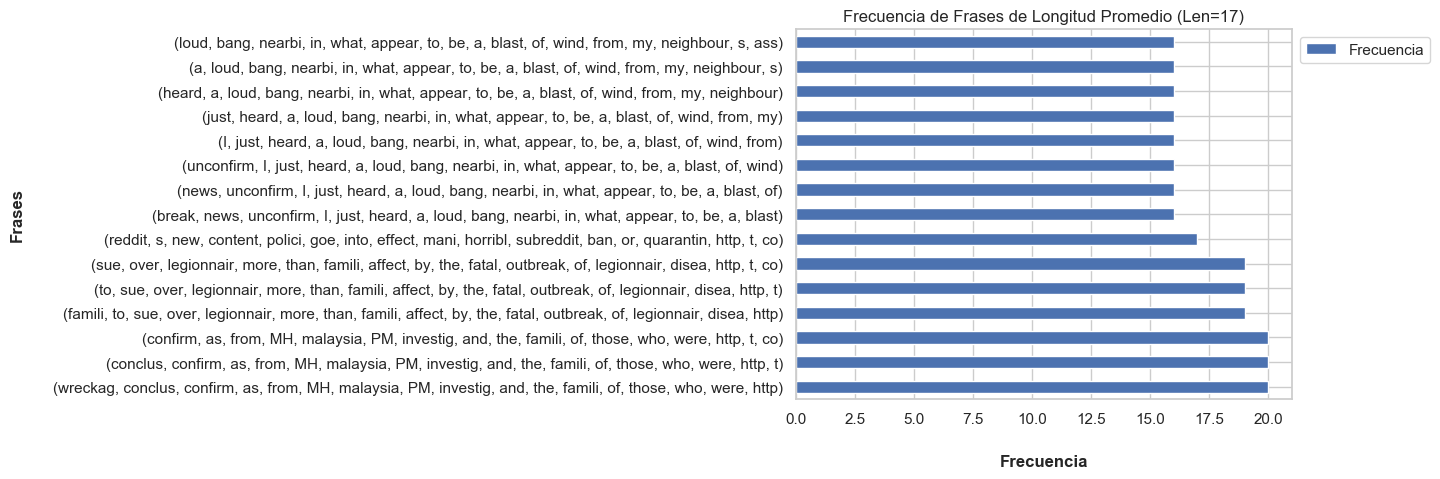

In [225]:
ax = M_mostCommonPhrasesDf.iloc[:15,:].plot.barh(x='Frases', y='Frecuencia')
ax.set_xlabel("Frecuencia", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Frases", labelpad=20, weight='bold', size=12)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Frecuencia de Frases de Longitud Promedio (Len=17)")

Text(0.5, 1.0, 'Frecuencia de Frases de Longitud Promedio (Len=17)')

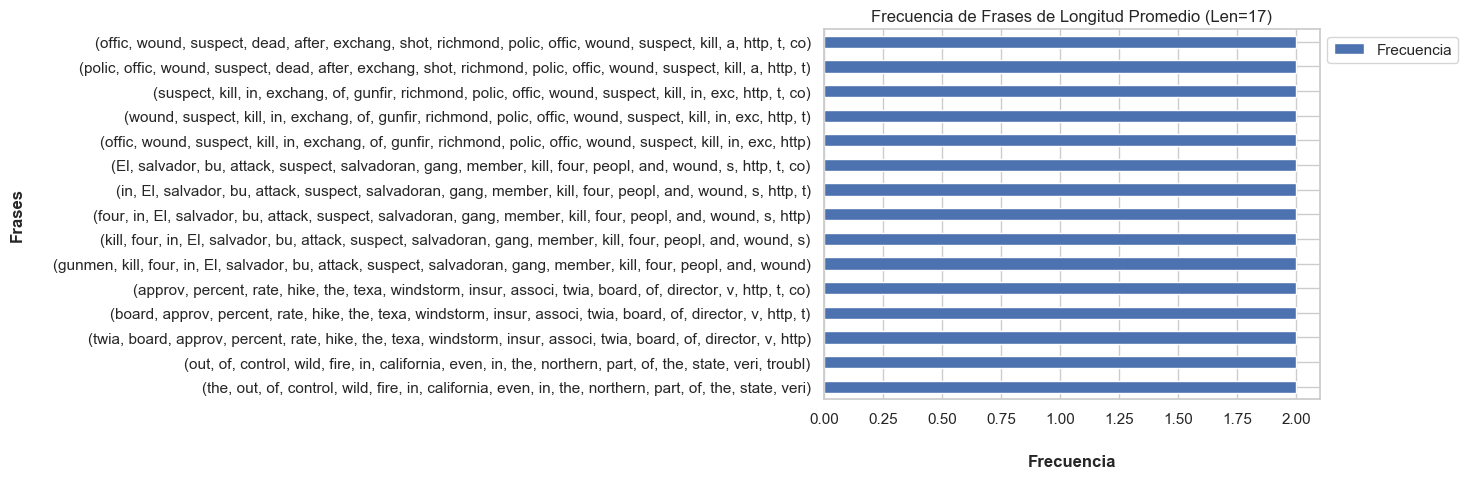

In [226]:

ax = M_mostCommonPhrasesDf[M_mostCommonPhrasesDf['Frecuencia']>1].tail(15).plot.barh(x='Frases', y='Frecuencia')
ax.set_xlabel("Frecuencia", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Frases", labelpad=20, weight='bold', size=12)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Frecuencia de Frases de Longitud Promedio (Len=17)")

In [227]:
filteredCommonHashtag= [t for t in commonHashtag if t[1]>1]
top15LessCommon=filteredCommonHashtag[-15:]
top15LessCommon

[('sing', 2),
 ('tsunami', 2),
 ('computer', 2),
 ('toronto', 2),
 ('thegame', 2),
 ('stormchase', 2),
 ('amsterdam', 2),
 ('volcano', 2),
 ('billings', 2),
 ('rapidcity', 2),
 ('cheyenne', 2),
 ('whirlwind', 2),
 ('sale', 2),
 ('jonathanferrell', 2),
 ('kashmir', 2)]